In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [1]:
import os, json
import pandas as pd
import numpy as np
import glob
df = pd.DataFrame()

path_to_json = 'data/' 

json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)

for file in file_list:
    data = pd.read_json(file, lines=True)
    df = pd.concat([df,data], ignore_index = True)

In [2]:
json_struct = json.loads(df.to_json(orient="records"))
df_flat = pd.json_normalize(json_struct)

In [3]:
file_list

['data/this-american-life_getting-out.json',
 'data/npr-politics_school-mask-ban.json',
 'data/conan-obrien_cecily-strong.json',
 'data/99-invisible_matters-of-time.json',
 'data/npr-politics_cutting-unemployment.json',
 'data/radiolab_dark-side-of-the-earth.json',
 'data/masters-of-scale_build-the-right-flywheel.json',
 'data/my-first-million_the-secret-to-being-great.json',
 'data/the-internet-says-its-true_hollywood.json',
 'data/npr-politics_august-27th.json',
 'data/a16z_developers-as-creatives.json',
 'data/the-internet-says-its-true_hidden-village.json',
 'data/this-american-life_essential.json',
 'data/conan-obrien_joel-mchale.json',
 'data/my-first-million_how-to-build-a-community.json',
 'data/99-invisible_stuff-the-british-stole.json',
 'data/masters-of-scale_make-it-epic.json',
 'data/radiolab_dinopocalypse-redux.json',
 'data/a16z_malaria-vaccine.json',
 'data/a16z_crypto.json',
 'data/masters-of-scale_master-your-emotions.json']

In [4]:
test_file = open('data/masters-of-scale_build-the-right-flywheel.json')
test_file = json.load(test_file)

In [5]:
test_file.keys()

dict_keys(['transcriber', 'created', 'results'])

In [6]:
test_file['results'].keys()

dict_keys(['transcripts', 'items'])

In [7]:
type(test_file['results']['items'])

list

In [8]:
test_file['results']['items'][0]

{'start_time': 0.08,
 'end_time': 0.16,
 'alternatives': [{'confidence': '1.0', 'content': 'Hi'}],
 'type': 'pronunciation'}

In [9]:
test_file['results']['items'][-1]

{'start_time': 2792.08,
 'end_time': 2792.32,
 'alternatives': [{'confidence': '1.0', 'content': 'Howard'}],
 'type': 'pronunciation'}

In [9]:
from generate import Highlighter

In [10]:
model = Highlighter()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
model.get_highlights(sample)

{0: "Hi Listeners, it's read here with some exciting news. The master scale book is now on sale. If you enjoy this podcast you're absolute going to love this book, the Master Scale Book Delivers Real Entrepreneurial Wisdom and some of the most transformative business advice.",
 1: "My Africanamerican kids, it was easier to teach them to read and write and harder to teach them to speak, and so we did a lot in pairs so that they could build off of one another's strengths and weaknesses. I wanted them to learn some Spanish.",
 2: 'These products did not arrive until December twenty. Third, how did Matthew break the bad news to his customers and how did that experience influence?',
 3: "I wanted to talk to Wendy cop about this, because she's thought of not just one but two networks across her career. The first teach for America was a brand new model for connecting high performing college graduates with underserved school districts across the country since they're founding in one thousand n

In [220]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [221]:
sentences = nltk.tokenize.sent_tokenize(sample)

In [222]:
#!pip install hyperopt

In [223]:
#!pip install -U sentence-transformers

In [224]:
# !pip install tensorflow
# !pip install --upgrade tensorflow-hub

In [225]:
# from hyperopt import hp
from sentence_transformers import SentenceTransformer
# import tensorflow as tf
# import tensorflow_hub as hub

In [226]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# model_use = hub.load(module_url)
model_st1 = SentenceTransformer('all-mpnet-base-v2')
# model_st2 = SentenceTransformer('all-MiniLM-L6-v2')
# model_st3 = SentenceTransformer('paraphrase-mpnet-base-v2')

In [227]:
def embed(model, model_type, sentences):
  """
  wrapper function for generating message embeddings
  """
  if model_type == 'use':
      embeddings = model(sentences)
  elif model_type == 'sentence transformer':
      embeddings = model.encode(sentences)
  
  return embeddings

# generate embeddings for each model
#embeddings_use = embed(model_use, 'use', sentences)
embeddings_st1 = embed(model_st1, 'sentence transformer', sentences)
#embeddings_st2 = embed(model_st2, 'sentence transformer', sentences)
#embeddings_st3 = embed(model_st3, 'sentence transformer', sentences)

In [228]:
embeddings_st1.shape

(348, 768)

In [230]:
# First let import the most necessary libs
import pandas as pd
import numpy as np
# Library to import pre-trained model for sentence embeddings
from sentence_transformers import SentenceTransformer
# Calculate similarities between sentences
from sklearn.metrics.pairwise import cosine_similarity
# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
# package for finding local minimas
from scipy.signal import argrelextrema
import math

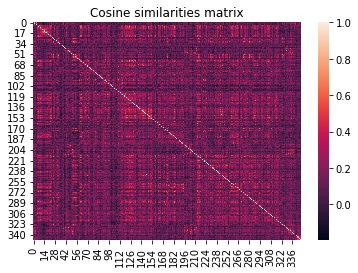

In [231]:
# Create similarities matrix
similarities = cosine_similarity(embeddings_st1)
# Lets plot the result we got
sns.heatmap(similarities).set_title('Cosine similarities matrix');

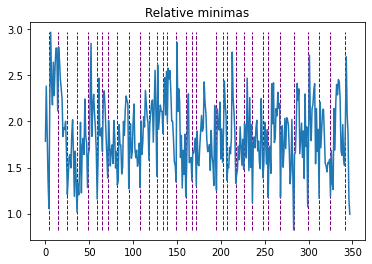

In [232]:
def rev_sigmoid(x:float)->float:
    return (1 / (1 + math.exp(0.5*x)))
    
def activate_similarities(similarities:np.array, p_size=10)->np.array:
        """ Function returns list of weighted sums of activated sentence similarities
        Args:
            similarities (numpy array): it should square matrix where each sentence corresponds to another with cosine similarity
            p_size (int): number of sentences are used to calculate weighted sum 
        Returns:
            list: list of weighted sums
        """
        # To create weights for sigmoid function we first have to create space. P_size will determine number of sentences used and the size of weights vector.
        x = np.linspace(-10,10,p_size)
        # Then we need to apply activation function to the created space
        y = np.vectorize(rev_sigmoid) 
        # Because we only apply activation to p_size number of sentences we have to add zeros to neglect the effect of every additional sentence and to match the length ofvector we will multiply
        activation_weights = np.pad(y(x),(0,similarities.shape[0]-p_size))
        ### 1. Take each diagonal to the right of the main diagonal
        diagonals = [similarities.diagonal(each) for each in range(0,similarities.shape[0])]
        ### 2. Pad each diagonal by zeros at the end. Because each diagonal is different length we should pad it with zeros at the end
        diagonals = [np.pad(each, (0,similarities.shape[0]-len(each))) for each in diagonals]
        ### 3. Stack those diagonals into new matrix
        diagonals = np.stack(diagonals)
        ### 4. Apply activation weights to each row. Multiply similarities with our activation.
        diagonals = diagonals * activation_weights.reshape(-1,1)
        ### 5. Calculate the weighted sum of activated similarities
        activated_similarities = np.sum(diagonals, axis=0)
        return activated_similarities

# Let's apply our function. For long sentences i reccomend to use 10 or more sentences
activated_similarities = activate_similarities(similarities, p_size=10)

# Let's create empty fig for our plor
fig, ax = plt.subplots()
### 6. Find relative minima of our vector. For all local minimas and save them to variable with argrelextrema function
minimas = argrelextrema(activated_similarities, np.less, order=4) #order parameter controls how frequent should be splits. I would not reccomend changing this parameter.
# plot the flow of our text with activated similarities
sns.lineplot(y=activated_similarities, x=range(len(activated_similarities)), ax=ax).set_title('Relative minimas');
# Now lets plot vertical lines in order to see where we created the split
plt.vlines(x=minimas, ymin=min(activated_similarities), ymax=max(activated_similarities), colors='purple', ls='--', lw=1, label='vline_multiple - full height')


In [284]:
sent_details = []
split_points = set([each for each in minimas[0]])
paras = []
text = ''
para_num = 0
para_pos = 0
for num, sent in enumerate(sentences):
    curr = {}
    curr['sentence'] = sent
    curr['pos'] = num
    curr['para_num'] = para_num
    curr['para_pos'] = para_pos 
    if num in split_points:
      paras.append(text)
      text =f'{sent} '
      para_num += 1
      para_pos = 0
      curr['para_num'] = para_num
      curr['para_pos'] = para_pos 
    else:
      text+=f'{sent} '
    sent_details.append(curr)
    para_pos += 1
paras.append(text)

In [285]:
len(split_points)

33

In [286]:
for para in paras:
  print(para)
  print('\n')

Hi Listeners, it's read here with some exciting news. The master scale book is now on sale. If you enjoy this podcast you're absolute going to love this book, the Master Scale Book Delivers Real Entrepreneurial Wisdom and some of the most transformative business advice. I've ever heard all wrapped in the stories that make the ideas even more memorable and relatable, whether you're in the midst of scaling, a business pitching a new idea, making a critical pivot or leading a team through a new and exciting stage. 


This is the book for you ordered online today at Mastros SCALECOM book or pick it up at your local bookstore. We spent a very interesting summer in North Ridge, California, complete with a killer, earthquake and all kinds of other things happening, and I would say we were less than wholly prepared to enter the classroom. That's lifelong educator, Kya Henderson Kys, describing a time in the early nineties where she spent a summer training with a group of young teachers for tea

In [236]:
#!pip install hdbscan

In [237]:
#!pip uninstall umap
#!pip install umap-learn

In [238]:
import umap.umap_ as umap
import hdbscan

In [239]:
def generate_umap_embeddings(sentence_embeddings, 
                             n_neighbors = 10, 
                             n_components = 32,
                             random_state = 1):
  umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(sentence_embeddings))
  return umap_embeddings

In [240]:
def generate_clusters(embeddings, min_cluster_size = 3):
    """
    Generate HDBSCAN cluster object.
    """
    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(embeddings)
    return clusters

In [241]:
def objective(params, embeddings, label_lower, label_upper):
    """
    Objective function for hyperopt to minimize, which incorporates constraints
    on the number of clusters we want to identify
    """

    def score_clusters(clusters, prob_threshold = 0.05):
      """
      Returns the label count and cost of a given cluster supplied from running hdbscan
      """
      
      cluster_labels = clusters.labels_
      label_count = len(np.unique(cluster_labels))
      total_num = len(clusters.labels_)
      cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
      
      return label_count, cost
    
    clusters = generate_clusters(embeddings, 
                                 n_neighbors = params['n_neighbors'], 
                                 n_components = params['n_components'], 
                                 min_cluster_size = params['min_cluster_size'],
                                 random_state = params['random_state'])
    
    label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
    
    #15% penalty on the cost function if outside the desired range of groups
    if label_count < label_lower:
        penalty = 0.15 * abs(label_count - label_lower)
    elif label_count > label_upper:
        penalty = 0.15 * abs(label_count - label_upper)
    else:
        penalty = 0
    
    loss = cost + penalty
    
    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}

def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    """
    Perform bayseian search on hyperopt hyperparameter space to minimize objective function
    """
    
    trials = Trials()
    fmin_objective = partial(objective, embeddings=embeddings, label_lower=label_lower, label_upper=label_upper)
    best = fmin(fmin_objective, 
                space = space, 
                algo=tpe.suggest,
                max_evals=max_evals, 
                trials=trials)

    best_params = space_eval(space, best)
    print ('best:')
    print (best_params)
    print (f"label count: {trials.best_trial['result']['label_count']}")
    
    best_clusters = generate_clusters(embeddings, 
                                      n_neighbors = best_params['n_neighbors'], 
                                      n_components = best_params['n_components'], 
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])
    
    return best_params, best_clusters, trials

In [242]:
# from hyperopt import hp
# from functools import partial
# from hyperopt import fmin, tpe, STATUS_OK, space_eval, Trials
hspace = {
    "n_neighbors": hp.choice('n_neighbors', range(8,12)),
    "n_components": hp.choice('n_components', range(64,128)),
    "min_cluster_size": hp.choice('min_cluster_size', range(8,12)),
    "min_samples": None,
    "random_state": 42
}

label_lower = 6
label_upper = len(paras)//2
max_evals = 50

In [243]:
# best_params, best_clusters, trials = bayesian_search(embeddings_st1, 
#                                                      space=hspace, 
#                                                      label_lower=label_lower, 
#                                                      label_upper=label_upper, 
#                                                      max_evals=max_evals)

In [244]:
#best_clusters
# cl2 = best_clusters

In [245]:
umap_embeddings = generate_umap_embeddings(embeddings_st1)

In [246]:
sent_df = pd.json_normalize(sent_details)

In [247]:
sent_df

,sentence,pos,para_num,para_pos
0,"Hi Listeners, it's read here with some excitin...",0,0,0
1,The master scale book is now on sale.,1,0,1
2,If you enjoy this podcast you're absolute goin...,2,0,2
3,I've ever heard all wrapped in the stories tha...,3,0,3
4,This is the book for you ordered online today ...,4,1,0
...,...,...,...,...
343,Our executive producers are June Cohen and Dar...,343,33,2
344,Our supervising producer is j Punjabi.,344,33,3
345,"Our producers are Jordan, McLeod Adam skews, K...",345,33,4
346,Our editor at large is Bob Sapian.,346,33,5


In [248]:
vectorized = pd.get_dummies(sent_df, columns=['para_num', 'para_pos'])

In [249]:
vectorized = vectorized.drop('sentence', axis=1)

In [250]:
cl_embeddings = np.concatenate((vectorized.to_numpy(), umap_embeddings),axis=1)

In [251]:
cl = generate_clusters(cl_embeddings)

In [252]:
len(cl.labels_)

348

In [253]:
cl.labels_

array([ 3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4, -1, -1, -1, -1,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6, -1,  7, -1,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7, -1,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8, -1,  8,  8,  8,  8,  8,  8,  8, -1,  8, -1,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, -1, -1, -1, -1, 13, 13, 13,
       13, 13, 13, -1, 14, -1, 14, -1, 14, -1, 14, -1, 14, -1, 14, -1, 12,
       12, 12, 12, 12, 12, 12, -1, -1, -1, -1, 16, 16, 16, 16, -1, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, -1, 11, 11, 11, 11, 11, -1, 11, -1,
       -1, -1, -1, 10, -1, -1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, -1, 10, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [254]:
cl.probabilities_

array([0.89491498, 1.        , 1.        , 1.        , 0.84259865,
       0.74920273, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.90746121, 1.        , 0.82462746,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.78084836,
       0.        , 0.        , 0.        , 0.        , 0.81551407,
       1.        , 1.        , 1.        , 0.86530408, 0.85449048,
       0.79092536, 0.79092536, 1.        , 1.        , 1.        ,
       0.98825533, 0.        , 0.81182391, 0.        , 0.87707714,
       1.        , 0.93267728, 1.        , 1.        , 0.95962205,
       1.        , 1.        , 1.        , 0.94013908, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.91976884, 1.        , 1.        , 1.        , 1.        ,
       0.93139753, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.     

In [255]:
cluster_details = []
for idx, sent in enumerate(sentences):
  cluster_dict = {
               'st1_cluster': cl.labels_[idx], 
               'st1_cluster_prob': cl.probabilities_[idx]}
  cluster_details.append(cluster_dict)

In [256]:
sent_df = pd.json_normalize(sent_details)

In [257]:
sent_df = sent_df.join(pd.json_normalize(cluster_details))

In [258]:
sent_df

,sentence,pos,para_num,para_pos,st1_cluster,st1_cluster_prob
0,"Hi Listeners, it's read here with some excitin...",0,0,0,3,0.894915
1,The master scale book is now on sale.,1,0,1,3,1.000000
2,If you enjoy this podcast you're absolute goin...,2,0,2,3,1.000000
3,I've ever heard all wrapped in the stories tha...,3,0,3,3,1.000000
4,This is the book for you ordered online today ...,4,1,0,3,0.842599
...,...,...,...,...,...,...
343,Our executive producers are June Cohen and Dar...,343,33,2,2,1.000000
344,Our supervising producer is j Punjabi.,344,33,3,2,1.000000
345,"Our producers are Jordan, McLeod Adam skews, K...",345,33,4,2,1.000000
346,Our editor at large is Bob Sapian.,346,33,5,2,1.000000


In [259]:
dict(sent_df.groupby("st1_cluster")["sentence"].count())

{-1: 43,
 0: 18,
 1: 58,
 2: 74,
 3: 5,
 4: 20,
 5: 8,
 6: 4,
 7: 16,
 8: 20,
 9: 12,
 10: 14,
 11: 6,
 12: 7,
 13: 6,
 14: 6,
 15: 12,
 16: 5,
 17: 14}

In [260]:
sent_df.query('st1_cluster == 1').sort_values(by = ['st1_cluster_prob', 'para_pos', 'para_num'], ascending = [False, True, True])

,sentence,pos,para_num,para_pos,st1_cluster,st1_cluster_prob
217,There isn't a separate teach for Cleveland tea...,217,23,0,1,1.000000
226,Boggling.,226,24,0,1,1.000000
236,So I had no option so I was just realizing.,236,25,0,1,1.000000
248,It needs to be opted in.,248,26,0,1,1.000000
218,"I had a total panic, like called the person wh...",218,23,1,1,1.000000
227,"To me, I mean it shattered all of my preconcep...",227,24,1,1,1.000000
237,I need to choose like teach for America needs ...,237,25,1,1,1.000000
269,This isn't all that different from the mindset...,269,28,1,1,1.000000
228,I mean brilliant people all over the world in ...,228,24,2,1,1.000000
238,"We have a set of unifying principles, which yo...",238,25,2,1,1.000000


In [261]:
sent_df.query('st1_cluster == 1').sort_values(by = ['st1_cluster_prob', 'pos'])

,sentence,pos,para_num,para_pos,st1_cluster,st1_cluster_prob
272,To say: How are you all doing this?,272,28,4,1,0.903578
213,She had just finished a revelatory trip to Ind...,213,22,6,1,0.917602
242,This you come to US approach to the distribute...,242,25,6,1,0.943519
251,That pace has been shockingly fast and I don't...,251,26,3,1,0.949415
219,I don't think this is going to work.,219,23,2,1,0.968382
249,"You can't force a school system, much less a s...",249,26,1,1,0.971333
268,Don't worry!,268,28,0,1,0.991786
270,"We talk about our masters of scale, we go in d...",270,28,2,1,0.993286
254,That was the AH?,254,27,0,1,0.995795
255,This is the validation of that network thesis ...,255,27,1,1,0.995795


In [262]:
para_beginnings = sent_df.query('para_pos < 2 & st1_cluster_prob > 0.85')

In [263]:
sent_df.query('st1_cluster != -1').groupby("st1_cluster")["sentence"].count().sort_values(ascending = False)

st1_cluster
2     74
1     58
4     20
8     20
0     18
7     16
10    14
17    14
15    12
9     12
5      8
12     7
11     6
13     6
14     6
3      5
16     5
6      4
Name: sentence, dtype: int64

In [264]:
para_beginnings.groupby("st1_cluster")["sentence"].count()

st1_cluster
0      4
1     12
2     10
3      2
4      1
6      1
7      2
8      5
9      1
11     1
12     2
14     1
15     3
16     1
17     3
Name: sentence, dtype: int64

In [281]:
def create_highlights(sent_df, sentences):
  def get_sentence(position):
    return sentences[position]

  total_sentences = len(sent_df)
  clusters = sent_df.query('st1_cluster != -1').groupby("st1_cluster")["sentence"].count().sort_values(ascending = False).tolist()
  para_beginnings = sent_df.query('para_pos < 2 & st1_cluster_prob > 0.85')
  highlights = set([0,1,2])
  chunks = {0 : [0, 1, 2]}
  change = True
  count = 1
  while len(highlights) <= 20:
    if change == False:
      break
    change = False
    for cluster in clusters:
      candidates = para_beginnings.query('st1_cluster == '+ str(cluster)).sort_values(by = ['pos'])['pos'].tolist()
      for candidate in candidates:
        if len(sentences[candidate]) < 50:
          continue
        if candidate not in highlights:
          highlights.add(candidate)
          chunks[count] = [candidate]
          if (candidate + 1) <= (total_sentences-1):
            highlights.add(candidate + 1)
            chunks[count].append(candidate+1)
          count += 1
          change = True
          break
  
  chunks = sorted(chunks.values(), key=lambda item: item[0])
  final_hl = {}
  count = 0
  for chunk in chunks:
    final_hl[count] = " ".join(map(get_sentence, chunk))
    count += 1
  return final_hl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [282]:
res =create_highlights(sent_df, sentences)

In [283]:
res

{0: "Hi Listeners, it's read here with some exciting news. The master scale book is now on sale. If you enjoy this podcast you're absolute going to love this book, the Master Scale Book Delivers Real Entrepreneurial Wisdom and some of the most transformative business advice.",
 1: "My Africanamerican kids, it was easier to teach them to read and write and harder to teach them to speak, and so we did a lot in pairs so that they could build off of one another's strengths and weaknesses. I wanted them to learn some Spanish.",
 2: 'These products did not arrive until December twenty. Third, how did Matthew break the bad news to his customers and how did that experience influence?',
 3: "I wanted to talk to Wendy cop about this, because she's thought of not just one but two networks across her career. The first teach for America was a brand new model for connecting high performing college graduates with underserved school districts across the country since they're founding in one thousand n